## TP SVM

Support Vector Machines (SVM) are a very commonly used type of model. They show great success to resolve non-linear problems, even if the computation cost can be big in high dimension.

SVM differ from previous models in the way that they try to maximise the margin between the samples and the prediction frontier. Another particularity of the method is the use of the "Kernel trick" : instead of projeting the points into a new non-linear space, the cost function can be computed using a kernel, thus reducing the computing power necessary to fit the model.

In [1]:
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

MNIST is a dataset containing 28x28 pixel images of digits, it is often used to benchmark learning algorithms : http://yann.lecun.com/exdb/mnist/.

### Question 0 :

Download the MNIST Dataset from the above website.

### Question 1 :

Load the data and select a subset of it (otherwise the training of models will be too long).

In [2]:
MNIST_train_df = pd.read_csv('data/mnist_train.csv', sep=',', index_col=0)
MNIST_train_small = MNIST_train_df.iloc[0:1200]

print(MNIST_train_small.head(3))
print(MNIST_train_small.shape)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
label                                                     ...                 
5        0    0    0    0    0    0    0    0    0     0  ...      0      0   
0        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
label                                                          
5          0      0      0      0      0      0      0      0  
0          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  

[3 rows x 784 columns]
(1200, 784)


### Question 2 :

Define a function allowing to plot some of the samples. Also check the distribution of data accross labels.

In [3]:
def plot_elt(elt,label):
    two_d = (np.reshape(elt, (28, 28)) * 255).astype(np.uint8)
    plt.title('label: {0}'. format(label))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

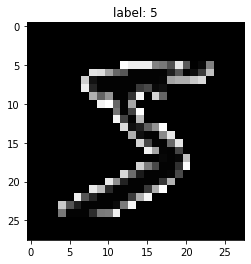

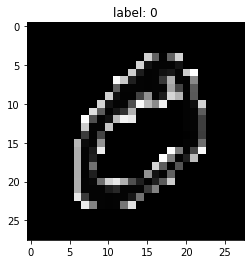

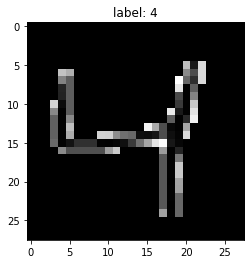

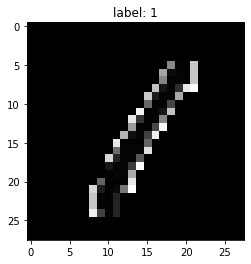

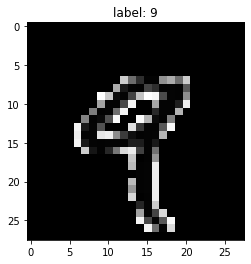

In [4]:
for i in range(5):
    plot_elt(MNIST_train_df.values[i],MNIST_train_df.index[i])

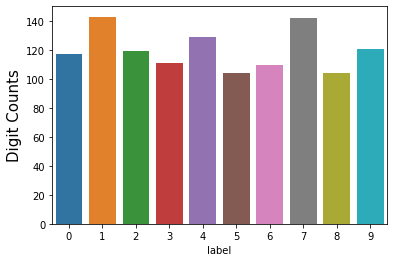

1    143
7    142
4    129
9    121
2    119
0    117
3    111
6    110
8    104
5    104
Name: label, dtype: int64


In [7]:
fig = sns.countplot(MNIST_train_small.index) 
plt.ylabel('Digit Counts', fontsize=15)
plt.show()

print(MNIST_train_small.index.value_counts())

### Question 3 :

Separate the training and test data.

In [8]:
X_tr = MNIST_train_small.iloc[:,0:]
y_tr = MNIST_train_small.index


X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr,test_size=0.2, random_state=30, stratify=y_tr)
#The use of stratify allows to keep the same proportions between train and test (otherwise bad luck could result in 
#an unbalalanced set)

Now, it is time to create a SVM model. Since some hyper - parameters should be optimized, it is recommanded to do a GridSearch. Some data pre-processing might be needed for the training to work well, don't forget to check !

### Question 4 :

Create the model and find the best parameters for it.

In [9]:

# As the pixels are ranging from 0 to 255, we standardize using Standard Scaler

steps = [('scaler', StandardScaler()), ('SVM', SVC())]
parameters = {'SVM__C':[0.001, 0.1],
              'SVM__gamma':[10,1],
              'SVM__kernel':["linear", "poly", "rbf"]}
pipeline = Pipeline(steps) # define 


grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)

print("score = %3.2f" %(grid.score(X_test, y_test)))

print("best parameters from train data: ", grid.best_params_)

score = 0.89
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10, 'SVM__kernel': 'linear'}


In [10]:
print(grid.cv_results_)

{'mean_fit_time': array([0.46727057, 0.92768378, 1.02210989, 0.47880292, 0.91647444,
       0.98519397, 0.31989698, 0.89017162, 0.99069657, 0.33416014,
       0.90862293, 1.03913302]), 'std_fit_time': array([0.01150459, 0.03302533, 0.01399714, 0.01210115, 0.02391432,
       0.00445855, 0.00362812, 0.00519174, 0.02224173, 0.00560389,
       0.00807508, 0.02546718]), 'mean_score_time': array([0.10762525, 0.1129281 , 0.1374105 , 0.11069608, 0.11291642,
       0.13968763, 0.08976393, 0.1105062 , 0.13762584, 0.0937161 ,
       0.11281147, 0.14541578]), 'std_score_time': array([0.00333176, 0.0016902 , 0.00260204, 0.00244495, 0.00326222,
       0.00072401, 0.0018138 , 0.00101805, 0.00532759, 0.00168152,
       0.00339731, 0.00290769]), 'param_SVM__C': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.1, 0.1,
                   0.1, 0.1, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill

### Question 5 :

Comment your results.

The result of the best model is 0.89, which is impressive considering the very small number of training samples. By checking the scores of the other models, we see that some obtain very bad results (as low as 0.2). This shows that the SVM model efficiency is very dependent on the choice of hyper-parameters. The choice of kernel is particularly important.


### Question 6 :

Predict on the test set and display results.

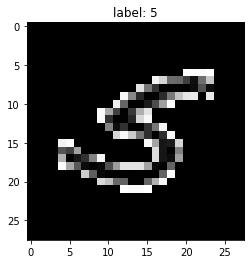

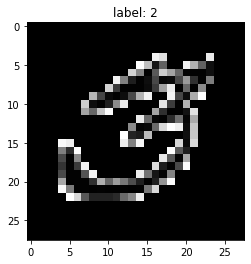

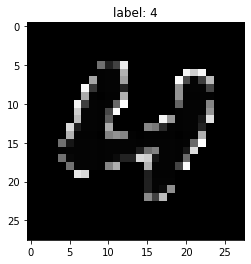

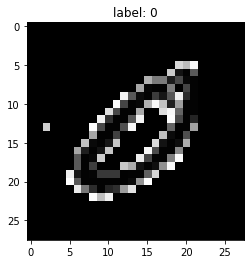

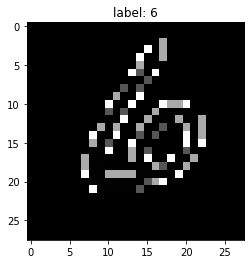

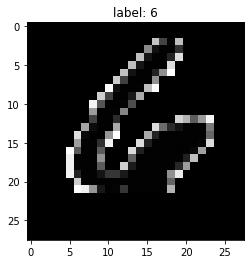

In [19]:
y_pred = grid.predict(X_test)

for i in (np.random.randint(0,len(X_test),6)):
    plot_elt(X_test.values[i],y_pred[i])

In [14]:
from sklearn.metrics import plot_confusion_matrix

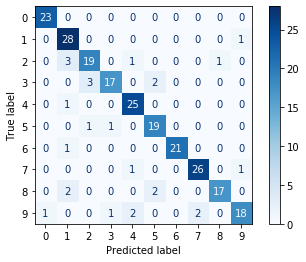

In [17]:
plot_confusion_matrix(grid, X_test, y_test,
                                 display_labels=np.arange(0,10,1),
                                 cmap=plt.cm.Blues)
plt.show()

### Question 7 :

Now, train a SVM on a big part of the training data and test it on the test data.

In [23]:
X_train = MNIST_train_df[:10000]
y_train = MNIST_train_df[:10000].index

MNIST_test_df = pd.read_csv('data/mnist_test.csv', sep=',', index_col=0)

X_test = MNIST_test_df
y_test = MNIST_test_df.index

In [24]:
steps_model = [('scaler', StandardScaler()), ('SVM', SVC(C = grid.best_params_['SVM__C'],
                                                        gamma = grid.best_params_['SVM__gamma'],
                                                        kernel = grid.best_params_['SVM__kernel']))]

final_pipeline = Pipeline(steps_model)

final_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=10,
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

### Question 8 :

Visualize the performance of the model.

score on the test data set= 0.93


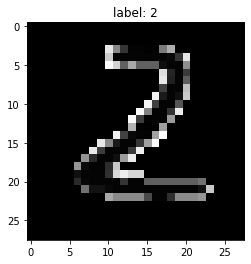

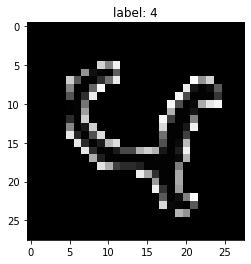

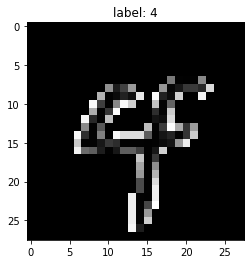

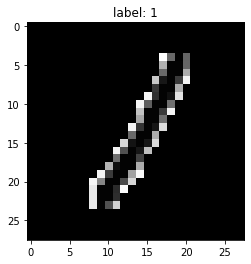

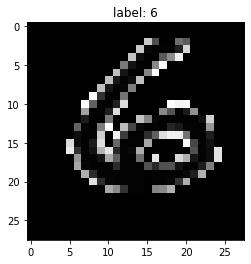

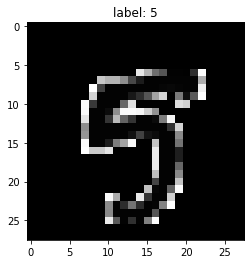

In [26]:
print("score on the test data set= %3.2f" %(final_pipeline.score(X_test, y_test)))

y_pred = final_pipeline.predict(X_test)


for i in (np.random.randint(0,len(X_test),6)):
    plot_elt(X_test.values[i],y_pred[i])


<Figure size 1080x720 with 0 Axes>

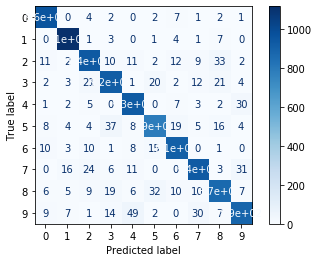

In [29]:
plt.figure(figsize = (15,10))
plot_confusion_matrix(final_pipeline, X_test, y_test,
                                 display_labels=np.arange(0,10,1),
                                 cmap=plt.cm.Blues)
plt.show()

### Question 9:

Compare with the results of the previous model.

The new model has a better accuracy (0.93), which is logical since more training data is used.

## Computational complexity

During all the trainings, we took subsets of data to train the SVM, otherwise the training time would have been too long.

### Question 10 :

Show the time complexity of the algorithm depending on the number of samples. Compare it to the perfromances and conclude.

In [37]:
N = np.logspace(1,4,20).astype(int)

times = []
scores = []
for n in N:
    
    t0 = time.time()
    X_train = MNIST_train_df[:n]
    y_train = MNIST_train_df[:n].index
    
    steps_model = [('scaler', StandardScaler()), ('SVM', SVC(C = grid.best_params_['SVM__C'],
                                                        gamma = grid.best_params_['SVM__gamma'],
                                                        kernel = grid.best_params_['SVM__kernel']))]

    pipe = Pipeline(steps_model)

    pipe.fit(X_train,y_train)
    times.append(time.time()-t0)
    scores.append(pipe.score(X_test, y_test))

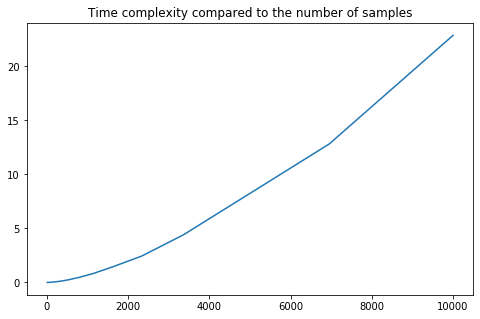

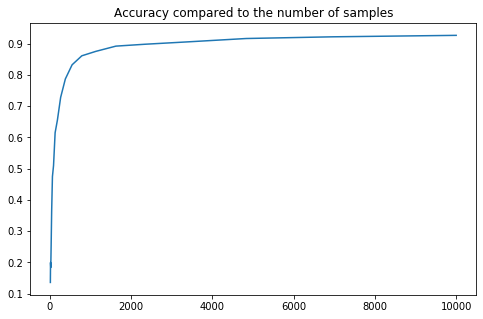

In [42]:
plt.figure(figsize = (8,5))
plt.plot(N,times,label ='time')
plt.title("Time complexity compared to the number of samples")
plt.show()

plt.figure(figsize = (8,5))
plt.plot(N,scores,label ='score')
plt.title("Accuracy compared to the number of samples")
plt.show()

We see that the time taken by the algorithm in exponential, while the performance rapidly converge. It is then very logical to only take a restricted number of samples to train a SVM.

## Comparison to a linear model

Let's see how our SVM model compares to a linear model.

### Question 11:

Choose a linear model, and fit it on the data. Compare it to the SVM and conclude.

In [43]:
from sklearn.linear_model import LogisticRegression

In [48]:

X_train = MNIST_train_df[:10000]
y_train = MNIST_train_df[:10000].index
steps_model = [('scaler', StandardScaler()), ('LR', LogisticRegression())]

final_pipeline = Pipeline(steps_model)

final_pipeline.fit(X_train,y_train)


/Users/arthurdelaitre/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

score on the test data set= 0.89


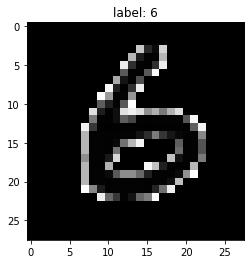

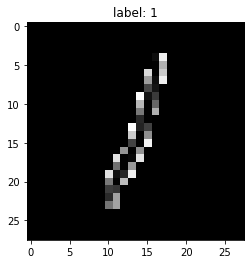

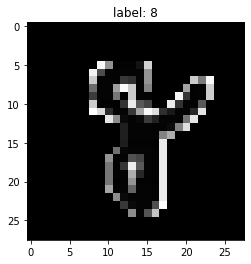

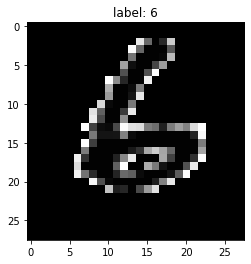

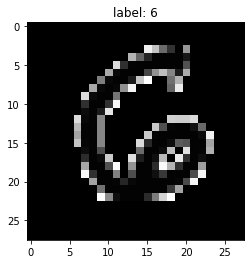

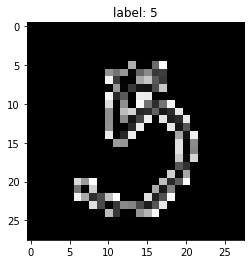

In [49]:
print("score on the test data set= %3.2f" %(final_pipeline.score(X_test, y_test)))

y_pred = final_pipeline.predict(X_test)


for i in (np.random.randint(0,len(X_test),6)):
    plot_elt(X_test.values[i],y_pred[i])

We see that a model like Logistic Regression obtains good performances on the MNIST dataset. It seems normal since the linear kernel of SVM was showing good results. The gap in performance is mainly explained by the fact that the SVM tries to find the biggest possible boundary.

## Bonus

Looking at the MNIST page : http://yann.lecun.com/exdb/mnist/, we see the performances of a lot of models, as well as papers describing the method used. Some pre-processing tecnics and more evolved models perform very well on the dataset (with less than 1% error rate).

Try to create a SVM model performing at least 98% accuracy on the test set.